In [1]:
import os
cwd = os.getcwd()
dir_name = os.path.join(cwd, 'other', 'ST-uniaxial')
file_ext = '.png'
if not os.path.exists(dir_name):
    os.makedirs(dir_name)


In [2]:
## looking for EM solutions in a uniaxial medium based on D 
## the information in divD seems should be incorporated somehow

from sympy import *
from Electromagnetics.VectorCalculus import *
from IPython.display import display, Math, Latex

from sympy.utilities.lambdify import lambdastr
from Electromagnetics import Misc

x, y, z, t = symbols('x y z t')
w = symbols(r'\omega')
k_0, kx, ky, kz = symbols('k_0 k_x k_y k_z')
eps_o, eps_e = symbols(r'\epsilon_o \epsilon_e')
mu_0, eps_0 = symbols(r'\mu_0 \epsilon_0')
Dx, Dy, Dz = symbols('D_x, D_y, D_z')

k = Matrix([kx, ky, kz])

r = Matrix([x, y, z])

D = Matrix([[Dx, Dy, Dz]])*exp(I*w*t - I*dotproduct(k, r))

display(Math('D = ' + latex(D)))

eps_r = Matrix([[eps_e, 0, 0],
              [0, eps_e, 0],
              [0, 0, eps_o]])

display(Math('\epsilon = ' + latex(eps_r)))

eq_wave = curl_r(curl_r(eps_r.inv()*D.T)).T + mu_0*eps_0*Matrix([Derivative(D[i], t, 2) for i in range(len(D))])
display(Math('eq wave = ' + latex(eq_wave)))

eq_wave = Misc.SymMatrixdoit(eq_wave)
display(Math('eq wave = ' + latex(eq_wave)))

eq_wave = Misc.SymMatrixSimplify(eq_wave*exp(-I*w*t+I*dotproduct(k, r)))
eq_wave = eq_wave.subs([(w**2*mu_0*eps_0, k_0**2)])
display(Math('eq wave = ' + latex(eq_wave)))

eq_wave[0] = eq_wave[0].simplify().subs([(Dz*kz, -Dx*kx-Dy*ky)])
eq_wave[1] = eq_wave[1].simplify().subs([(Dz*kz, -Dx*kx-Dy*ky)])
eq_wave[2] = eq_wave[2].simplify().subs([(Dx*kx+Dy*ky, -Dz*kz)])
display(Math('eq wave = ' + latex(eq_wave)))

A = Misc.SymMatrixSimplify(Misc.SymEqSysLinearToMat(eq_wave, [Dx, Dy, Dz]))
display(Math('A = ' + latex(A)))

A_det = A.det().simplify()
display(Math('|A| = ' + latex(A_det)))



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [5]:
## EM solutions in a uniaxial medium based on E 
## working perfect

from sympy import *
from Electromagnetics.VectorCalculus import *
from IPython.display import display, Math, Latex

from sympy.utilities.lambdify import lambdastr
from Electromagnetics import Misc

x, y, z, t = symbols('x y z t')
w = symbols(r'\omega')
k_0, kx, ky, kz = symbols('k_0 k_x k_y k_z')
eps_o, eps_e = symbols(r'\epsilon_{ro} \epsilon_{re}')
mu_0, eps_0 = symbols(r'\mu_0 \epsilon_0')
Ex, Ey, Ez = symbols('E_x, E_y, E_z')

k = Matrix([kx, ky, kz])

r = Matrix([x, y, z])

harm = exp(I*w*t - I*dotproduct(k, r))
E = Matrix([[Ex, Ey, Ez]])*harm

display(Math('E = ' + latex(E)))

eps_r = Matrix([[eps_o, 0, 0],
                [0, eps_o, 0],
                [0, 0, eps_e]])


display(Math('\epsilon_r = ' + latex(eps_r)))
print(latex(eps_r))

_D_ = (eps_r*E.T)
del_E = (1-eps_e/eps_o)*Derivative(Ez*harm, z)
eq_wave = del_square_vec_r(E) - gradient_r(del_E) - mu_0*eps_0*Matrix([Derivative(_D_[i], t, 2) for i in range(len(_D_))]).T
display(Math('eq wave = ' + latex(eq_wave)))

eq_wave = Misc.SymMatrixdoit(eq_wave).T
display(Math('eq wave = ' + latex(eq_wave)))

eq_wave = Misc.SymMatrixSimplify(eq_wave/harm)
eq_wave = eq_wave.subs([(w**2*mu_0*eps_0, k_0**2)])
display(Math('eq wave = ' + latex(eq_wave)))

A = Misc.SymMatrixSimplify(Misc.SymEqSysLinearToMat(eq_wave, [Ex, Ey, Ez]))
display(Math('A = ' + latex(A)))
print(latex(A))

A_det = A.det().simplify()
display(Math('|A| = ' + latex(A_det)))

#display(Math('A-B = ' + latex((B_det+A_det*eps_e*eps_o**2).simplify())))

print('ordinary mode')
div_E = (divergence_r(E).doit()/harm).simplify()                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
del_E = (del_E.doit()*exp(-I*w*t+I*dotproduct(k, r))).simplify()
display(Math(r'\nabla\cdot E = ' + latex(div_E) + ' = ' + latex(del_E)))
print(latex(del_E))

disp_o = A[0,0]
E_y_o = solve((div_E-del_E).subs(Ez, 0), Ey)[0]
display(Math( 'dispersion = ' + latex(disp_o)))
display(Math( 'E_y = ' + latex(E_y_o)))
k0_o = solve(disp_o, k_0)[1]
display(Math( 'k_{0o} = ' + latex(k0_o)))

E_o = Matrix([[1, E_y_o.subs(Ex,1), 0]])*ky
display(Math( 'E_o = ' + latex(E_o)))
print(latex(E_o))
H_o = Misc.SymMatrixSimplify(Misc.SymMatrixdoit(curl_r(E_o*harm)/harm)/(-I*w*mu_0))
display(Math( 'H_o = ' + latex(H_o)))
print(latex(H_o))
D_o = (eps_0*eps_r*E_o.T).T
display(Math( 'D_o = ' + latex(D_o)))
print(latex(D_o))

Eo_dot_Ho = (E_o*H_o.T)[0]
display(Math( r'E_o\cdot H_o = ' + latex(Eo_dot_Ho)))
k_dot_Do = (k.T*D_o.T)[0].simplify()
display(Math( r'k\cdot D_o = ' + latex(k_dot_Do)))

print('extraordinary mode')
disp_e = A[2,2]
E_x_e = solve((A[0,:]*E.T/harm)[0].simplify(), Ex)[0]
E_y_e = solve((A[1,:]*E.T/harm)[0].simplify(), Ey)[0]
display(Math( 'dispersion = ' + latex(disp_e)))
display(Math( 'E_x = ' + latex(E_x_e)))
display(Math( 'E_y = ' + latex(E_y_e)))
k0_e = solve(disp_e, k_0)[1]
display(Math( 'k_{0e} = ' + latex(k0_e)))

E_e = Matrix([[E_x_e.subs(Ez,1), E_y_e.subs(Ez,1), 1]])
display(Math( 'E_e = ' + latex(E_e)))
print(latex(E_e))
H_e = Misc.SymMatrixSimplify(Misc.SymMatrixdoit(curl_r(E_e*harm)/harm)/(-I*w*mu_0))
display(Math( 'H_e = ' + latex(H_e)))
print(latex(H_e))
D_e = (eps_0*eps_r*E_e.T).T
display(Math( 'D_e = ' + latex(D_e)))
print(latex(D_e))

Ee_dot_He = (E_e*H_e.T)[0].simplify()
display(Math( r'E_e\cdot H_e = ' + latex(Ee_dot_He)))
k_dot_De = (k.T*D_e.T)[0].simplify()
display(Math( r'k\cdot D_e = ' + latex(k_dot_De)))

De_dot_Do = (D_e*D_o.T)[0].simplify()
display(Math( r'D_e \cdot D_o = ' + latex(De_dot_Do)))
He_dot_Ho = (H_e*H_o.T)[0].simplify()
display(Math( r'H_e \cdot H_o = ' + latex(He_dot_Ho)))


print('-'*50)
eps_r_str = lambdastr((), eps_r).replace('\\', '').replace('{', '').replace('}', '')
eps_r_str = Misc.replace_whole_word(eps_r_str, 'I', '1j')
eps_r_str = Misc.replace_whole_word(eps_r_str, 'MutableDenseMatrix', 'np.array')
print('eps_r = {}'.format(eps_r_str))


k0_o_str = lambdastr((), k0_o).replace('\\', '').replace('{', '').replace('}', '')
k0_o_str = Misc.replace_whole_word(k0_o_str, 'I', '1j')
k0_o_str = Misc.replace_whole_word(k0_o_str, 'sqrt', 'np.sqrt')
print('k0_o = {}'.format(k0_o_str))

k0_e_str = lambdastr((), k0_e).replace('\\', '').replace('{', '').replace('}', '')
k0_e_str = Misc.replace_whole_word(k0_e_str, 'I', '1j')
k0_e_str = Misc.replace_whole_word(k0_e_str, 'sqrt', 'np.sqrt')
print('k0_e = {}'.format(k0_e_str))

D_o_str = lambdastr((), D_o).replace('\\', '').replace('{', '').replace('}', '')
D_o_str = Misc.replace_whole_word(D_o_str, 'I', '1j')
D_o_str = Misc.replace_whole_word(D_o_str, 'MutableDenseMatrix', 'np.array')
print('D_o = {}'.format(D_o_str))

H_o_str = lambdastr((), H_o).replace('\\', '').replace('{', '').replace('}', '')
H_o_str = Misc.replace_whole_word(H_o_str, 'I', '1j')
H_o_str = Misc.replace_whole_word(H_o_str, 'MutableDenseMatrix', 'np.array')
print('H_o = {}'.format(H_o_str))

D_e_str = lambdastr((), D_e).replace('\\', '').replace('{', '').replace('}', '')
D_e_str = Misc.replace_whole_word(D_e_str, 'I', '1j')
D_e_str = Misc.replace_whole_word(D_e_str, 'MutableDenseMatrix', 'np.array')
print('D_e = {}'.format(D_e_str))

H_e_str = lambdastr((), H_e).replace('\\', '').replace('{', '').replace('}', '')
H_e_str = Misc.replace_whole_word(H_e_str, 'I', '1j')
H_e_str = Misc.replace_whole_word(H_e_str, 'MutableDenseMatrix', 'np.array')
print('H_e = {}'.format(H_e_str))



<IPython.core.display.Math object>

<IPython.core.display.Math object>

\left[\begin{matrix}\epsilon_{ro} & 0 & 0\\0 & \epsilon_{ro} & 0\\0 & 0 & \epsilon_{re}\end{matrix}\right]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

\left[\begin{matrix}\epsilon_{ro} k_{0}^{2} - k_{x}^{2} - k_{y}^{2} - k_{z}^{2} & 0 & - \frac{k_{x} k_{z}}{\epsilon_{ro}} \left(\epsilon_{re} - \epsilon_{ro}\right)\\0 & \epsilon_{ro} k_{0}^{2} - k_{x}^{2} - k_{y}^{2} - k_{z}^{2} & - \frac{k_{y} k_{z}}{\epsilon_{ro}} \left(\epsilon_{re} - \epsilon_{ro}\right)\\0 & 0 & \epsilon_{re} k_{0}^{2} - \frac{\epsilon_{re} k_{z}^{2}}{\epsilon_{ro}} - k_{x}^{2} - k_{y}^{2}\end{matrix}\right]


<IPython.core.display.Math object>

ordinary mode


<IPython.core.display.Math object>

\frac{i E_{z}}{\epsilon_{ro}} k_{z} \left(\epsilon_{re} - \epsilon_{ro}\right)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

\left[\begin{matrix}k_{y} & - k_{x} & 0\end{matrix}\right]


<IPython.core.display.Math object>

\left[\begin{matrix}\frac{k_{x} k_{z}}{\mu_0 \omega} & \frac{k_{y} k_{z}}{\mu_0 \omega} & - \frac{k_{x}^{2} + k_{y}^{2}}{\mu_0 \omega}\end{matrix}\right]


<IPython.core.display.Math object>

\left[\begin{matrix}\epsilon_0 \epsilon_{ro} k_{y} & - \epsilon_0 \epsilon_{ro} k_{x} & 0\end{matrix}\right]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

extraordinary mode


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

\left[\begin{matrix}\frac{k_{x} k_{z} \left(- \epsilon_{re} + \epsilon_{ro}\right)}{\epsilon_{ro} \left(- \epsilon_{ro} k_{0}^{2} + k_{x}^{2} + k_{y}^{2} + k_{z}^{2}\right)} & \frac{k_{y} k_{z} \left(- \epsilon_{re} + \epsilon_{ro}\right)}{\epsilon_{ro} \left(- \epsilon_{ro} k_{0}^{2} + k_{x}^{2} + k_{y}^{2} + k_{z}^{2}\right)} & 1\end{matrix}\right]


<IPython.core.display.Math object>

\left[\begin{matrix}\frac{k_{y} \left(\epsilon_{re} k_{z}^{2} - \epsilon_{ro}^{2} k_{0}^{2} + \epsilon_{ro} k_{x}^{2} + \epsilon_{ro} k_{y}^{2}\right)}{\epsilon_{ro} \mu_0 \omega \left(- \epsilon_{ro} k_{0}^{2} + k_{x}^{2} + k_{y}^{2} + k_{z}^{2}\right)} & \frac{k_{x} \left(\epsilon_{re} k_{z}^{2} - \epsilon_{ro}^{2} k_{0}^{2} + \epsilon_{ro} k_{x}^{2} + \epsilon_{ro} k_{y}^{2}\right)}{\epsilon_{ro} \mu_0 \omega \left(\epsilon_{ro} k_{0}^{2} - k_{x}^{2} - k_{y}^{2} - k_{z}^{2}\right)} & 0\end{matrix}\right]


<IPython.core.display.Math object>

\left[\begin{matrix}\frac{\epsilon_0 k_{x} k_{z} \left(- \epsilon_{re} + \epsilon_{ro}\right)}{- \epsilon_{ro} k_{0}^{2} + k_{x}^{2} + k_{y}^{2} + k_{z}^{2}} & \frac{\epsilon_0 k_{y} k_{z} \left(- \epsilon_{re} + \epsilon_{ro}\right)}{- \epsilon_{ro} k_{0}^{2} + k_{x}^{2} + k_{y}^{2} + k_{z}^{2}} & \epsilon_0 \epsilon_{re}\end{matrix}\right]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

--------------------------------------------------
eps_r = lambda : (np.array([[epsilon_ro, 0, 0], [0, epsilon_ro, 0], [0, 0, epsilon_re]]))
k0_o = lambda : (np.sqrt((k_x**2 + k_y**2 + k_z**2)/epsilon_ro))
k0_e = lambda : (np.sqrt(k_z**2/epsilon_ro + k_x**2/epsilon_re + k_y**2/epsilon_re))
D_o = lambda : (np.array([[epsilon_0*epsilon_ro*k_y, -epsilon_0*epsilon_ro*k_x, 0]]))
H_o = lambda : (np.array([[k_x*k_z/(mu_0*omega), k_y*k_z/(mu_0*omega), -(k_x**2 + k_y**2)/(mu_0*omega)]]))
D_e = lambda : (np.array([[epsilon_0*k_x*k_z*(-epsilon_re + epsilon_ro)/(-epsilon_ro*k_0**2 + k_x**2 + k_y**2 + k_z**2), epsilon_0*k_y*k_z*(-epsilon_re + epsilon_ro)/(-epsilon_ro*k_0**2 + k_x**2 + k_y**2 + k_z**2), epsilon_0*epsilon_re]]))
H_e = lambda : (np.array([[k_y*(epsilon_re*k_z**2 - epsilon_ro**2*k_0**2 + epsilon_ro*k_x**2 + epsilon_ro*k_y**2)/(epsilon_ro*mu_0*omega*(-epsilon_ro*k_0**2 + k_x**2 + k_y**2 + k_z**2)), k_x*(epsilon_re*k_z**2 - epsilon_ro**2*k_0**2 + epsilon_ro*k_x**2 + epsilon_ro*k_y**2)/(e

Populating the interactive namespace from numpy and matplotlib


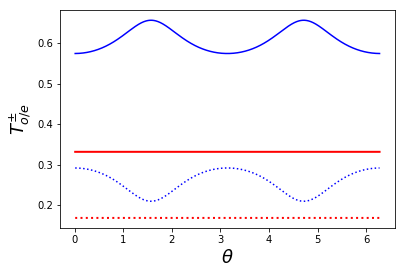

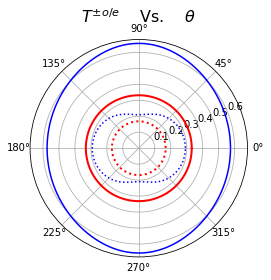

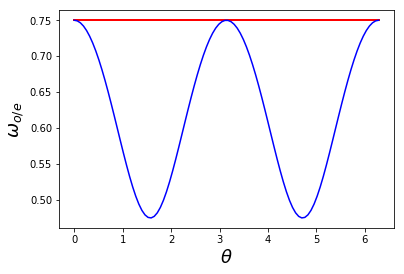

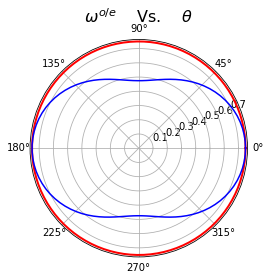

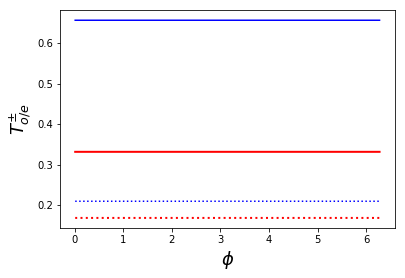

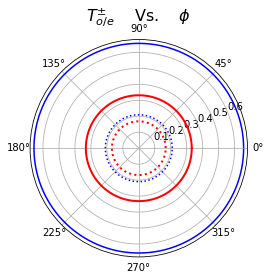

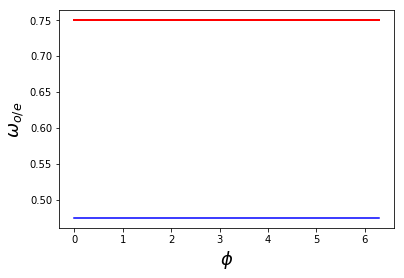

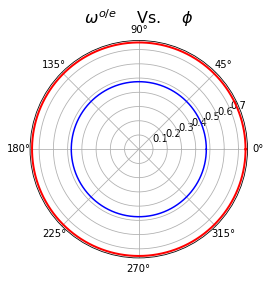

In [11]:

#a_op*|Do|*a_Do + a_om*|Do|*a_Do = Di.dot(a_Do)*a_Do
#a_op*|Ho(w_o)|*a_Ho - a_om*|Ho(-w_o)|*a_Ho = Hi.dot(a_Ho)*a_Ho
#a_ep*|De|*a_De + a_em*|De|*a_De = Di.dot(a_De)*a_De
#a_ep*|He(w_e)|*a_He - a_em*|He(-w_e)|*a_He = Hi.dot(a_He)*a_He

%pylab inline

import numpy as np
from scipy import constants
import matplotlib.pyplot as plt
import time

del_small = 1.0e-10

class IsotropicToUniaxialTimeStep:
    def __init__(self):
        self.mu_0 = constants.mu_0
        self.eps_0 = constants.epsilon_0
        return
    
    def setIsotropicParameters(self, k_iso, E_iso, eps_r_iso, w_positive=True):
        mu_0 = self.mu_0
        epsilon_0 = self.eps_0
        self.k_iso = k_iso
        self.E_iso = E_iso
        self.D_iso = eps_r_iso*epsilon_0*E_iso
        self.eps_r_iso = eps_r_iso
        a_k_iso = k_iso/np.linalg.norm(k_iso)
        a_E_iso = E_iso/np.linalg.norm(E_iso)
        assert np.abs(a_k_iso.dot(a_E_iso.T))<1.0e-10
        k0_iso = k_iso[0]**2 + k_iso[1]**2 + k_iso[2]**2
        w_iso = k0_iso/np.sqrt(mu_0*epsilon_0*eps_r_iso)
        if not w_positive:
            w_iso *= -1
            k0_iso *= -1
        self.H_iso = np.cross(k_iso, E_iso)/(mu_0*w_iso)
        #print('k0_iso:{}'.format(k0_iso))
        #print('H_iso:{}'.format(self.H_iso))
        
        
    def setUniaxialParameters(self, eps_rxy, eps_rz):
        assert eps_rxy!=eps_rz
        self.eps_ro = eps_rxy
        self.eps_re = eps_rz
        
    def getk0_o(self):
        epsilon_ro = self.eps_ro
        epsilon_re = self.eps_re
        k_x, k_y, k_z = self.k_iso

        k0_o = np.sqrt((k_x**2 + k_y**2 + k_z**2)/epsilon_ro)
        #if(np.imag(k0_o)<0.0):
        #    k0_o *= -1
        return k0_o

    
    def getk0_e(self):
        epsilon_ro = self.eps_ro
        epsilon_re = self.eps_re
        k_x, k_y, k_z = self.k_iso
        
        k0_e = np.sqrt(k_z**2/epsilon_ro + k_x**2/epsilon_re + k_y**2/epsilon_re)
        if k_x==k_y==0.0:
            k0_e = np.sqrt((k_x**2 + k_y**2 + k_z**2)/epsilon_ro)
        #if np.abs(np.imag(k0_e))>1.0e-3:
        #    print("k_x={}, k_y={}, kz={}, k0_e={}".format(k_x, k_y, k_z, k0_e))
        #    time.sleep(1)
        #if(np.imag(k0_e)<0.0):
        #    k0_e *= -1
        return k0_e
        
        
    def getWo(self):
        mu_0 = self.mu_0
        epsilon_0 = self.eps_0
        k0_o = self.getk0_o()
        w_o = k0_o/np.sqrt(mu_0*epsilon_0)
        return w_o
    
    def getWe(self):
        mu_0 = self.mu_0
        epsilon_0 = self.eps_0
        k0_e = self.getk0_e()
        w_e = k0_e/np.sqrt(mu_0*epsilon_0)
        return w_e
    
    def getDo(self):
        mu_0 = self.mu_0
        epsilon_0 = self.eps_0
        epsilon_ro = self.eps_ro
        epsilon_re = self.eps_re
        k_x, k_y, k_z = self.k_iso
        omega = self.getWo()
        k_0 = self.getk0_o()
        Do = np.array([epsilon_0*epsilon_ro*k_y, -epsilon_0*epsilon_ro*k_x, 0])
        if np.abs(k_x)**2+np.abs(k_y)**2<del_small:
            Do = epsilon_0*epsilon_ro*self.E_iso
        return Do
    
    def getDe(self):
        mu_0 = self.mu_0
        epsilon_0 = self.eps_0
        epsilon_ro = self.eps_ro
        epsilon_re = self.eps_re
        k_x, k_y, k_z = self.k_iso
        omega = self.getWe()
        k_0 = self.getk0_e()
        if np.abs(k_x**2 + k_y**2 + k_z**2-epsilon_ro*k_0**2)<1.0e-6:
            if np.abs(k_x)**2+np.abs(k_y)**2>=del_small:
                assert False
        De = np.array([epsilon_0*k_x*k_z*(-epsilon_re + epsilon_ro)/(-epsilon_ro*k_0**2 + k_x**2 + k_y**2 + k_z**2), epsilon_0*k_y*k_z*(-epsilon_re + epsilon_ro)/(-epsilon_ro*k_0**2 + k_x**2 + k_y**2 + k_z**2), epsilon_0*epsilon_re])
        if np.abs(k_x)**2+np.abs(k_y)**2<del_small:
            a_kz = np.array([0, 0, np.sign(k_z)])
            De = np.cross(a_kz, epsilon_0*epsilon_ro*self.E_iso)
        return De
        
    def getHo(self):
        mu_0 = self.mu_0
        epsilon_0 = self.eps_0
        epsilon_ro = self.eps_ro
        epsilon_re = self.eps_re
        k_x, k_y, k_z = self.k_iso
        omega = self.getWo()
        k_0 = self.getk0_o()
        H_o = np.array([k_x*k_z/(mu_0*omega), k_y*k_z/(mu_0*omega), -(k_x**2 + k_y**2)/(mu_0*omega)])
        if np.abs(k_x)**2+np.abs(k_y)**2<del_small:
            a_z = np.array([0, 0, 1.0])
            H_o = np.cross(a_z, self.E_iso)*k_z/(mu_0*omega)
        return H_o
        
    def getHe(self):
        mu_0 = self.mu_0
        epsilon_0 = self.eps_0
        epsilon_ro = self.eps_ro
        epsilon_re = self.eps_re
        k_x, k_y, k_z = self.k_iso
        omega = self.getWe()
        k_0 = self.getk0_e()
        if np.abs(k_x**2 + k_y**2 + k_z**2-epsilon_ro*k_0**2)<1.0e-6:
            if np.abs(k_x)**2+np.abs(k_y)**2>=del_small:
                assert False
        H_e = np.array([k_y*(epsilon_re*k_z**2 - epsilon_ro**2*k_0**2 + epsilon_ro*k_x**2 + epsilon_ro*k_y**2)/(epsilon_ro*mu_0*omega*(-epsilon_ro*k_0**2 + k_x**2 + k_y**2 + k_z**2)), k_x*(epsilon_re*k_z**2 - epsilon_ro**2*k_0**2 + epsilon_ro*k_x**2 + epsilon_ro*k_y**2)/(epsilon_ro*mu_0*omega*(epsilon_ro*k_0**2 - k_x**2 - k_y**2 - k_z**2)), 0])
        if np.abs(k_x)**2+np.abs(k_y)**2<del_small:
            a_kz = np.array([0, 0, np.sign(k_z)])
            Ee = np.cross(a_kz, self.E_iso)
            a_z = np.array([0, 0, 1.0])
            H_e = np.cross(a_z, Ee)*k_z/(mu_0*omega)
        return H_e
    
    def get_a_eo_pm(self):
        Di = self.D_iso
        Do = self.getDo()
        Do_norm = np.linalg.norm(Do)
        a_Do = Do/Do_norm
        De = self.getDe()
        De_norm = np.linalg.norm(De)
        a_De = De/De_norm
        #print('De:{}, Do:{}'.format(De, Do))

        Hi = self.H_iso
        Ho = self.getHo()
        Ho_norm = np.linalg.norm(Ho)
        a_Ho = Ho/Ho_norm
        He = self.getHe()
        He_norm = np.linalg.norm(He)
        a_He = He/He_norm
        #print('He:{}, Ho:{}'.format(He, Ho))

        A_o = np.array([[1.0,  1.0],
                        [1.0, -1.0]])
        rhs_do = Di.dot(a_Do)/Do_norm 
        rhs_ho = Hi.dot(a_Ho)/Ho_norm 
        rhs_o = np.array([rhs_do, rhs_ho])
        c_do_pm = np.linalg.inv(A_o).dot(rhs_o.T)
        
        A_e = np.array([[1.0,  1.0],
                        [1.0, -1.0]])
        rhs_de = Di.dot(a_De)/De_norm 
        rhs_he = Hi.dot(a_He)/He_norm 
        rhs_e = np.array([rhs_de, rhs_he])
        c_de_pm = np.linalg.inv(A_e).dot(rhs_e.T)
        
        return c_do_pm, c_de_pm


    def getRT(self):

        Di_norm = np.linalg.norm(self.D_iso)
        Do_norm = np.linalg.norm(self.getDo())
        De_norm = np.linalg.norm(self.getDe())

        a_do_pm, a_de_pm = self.get_a_eo_pm()
        T_o_pm = a_do_pm*Do_norm/Di_norm
        T_e_pm = a_de_pm*De_norm/Di_norm
        return T_o_pm, T_e_pm
      
        
    
def getRT_theta(theta_arr, phi, w_iso, eps_r_iso, pol_iso_thetaphi, eps_rxy, eps_rz):
    N = len(theta_arr)
    c_do_p_arr = np.zeros(N)
    c_do_m_arr = np.zeros(N)
    c_de_p_arr = np.zeros(N)
    c_de_m_arr = np.zeros(N)
    for i in range(N):
        theta = theta_arr[i]
        a_iso = np.array([np.sin(theta)*np.cos(phi), np.sin(theta)*np.sin(phi), np.cos(theta)])
        k_0_iso = w_iso*np.sqrt(constants.epsilon_0*constants.mu_0)
        k_iso = k_0_iso*eps_r_iso*a_iso
        pol_iso = PolThetaPhi(theta, phi, a_theta=pol_iso_thetaphi[0], a_phi=pol_iso_thetaphi[1])
        E_iso = np.cross(a_iso, np.cross(a_iso, pol_iso))
        E_iso /= np.linalg.norm(E_iso)
        isotoux = IsotropicToUniaxialTimeStep()
        isotoux.setIsotropicParameters(k_iso, E_iso, eps_r_iso)
        isotoux.setUniaxialParameters(eps_rxy, eps_rz)
        c_do_pm, c_de_pm = isotoux.getRT()
        c_do_p_arr[i], c_do_m_arr[i] = c_do_pm
        c_de_p_arr[i], c_de_m_arr[i] = c_de_pm
    return c_do_p_arr, c_do_m_arr, c_de_p_arr, c_de_m_arr

def getWoe_theta(theta_arr, phi, w_iso, eps_r_iso, pol_iso_thetaphi, eps_rxy, eps_rz):
    N = len(theta_arr)
    w_o = np.zeros(N)
    w_e = np.zeros(N)
    for i in range(N):
        theta = theta_arr[i]
        a_iso = np.array([np.sin(theta)*np.cos(phi), np.sin(theta)*np.sin(phi), np.cos(theta)])
        k_0_iso = w_iso*np.sqrt(constants.epsilon_0*constants.mu_0)
        k_iso = k_0_iso*eps_r_iso*a_iso
        pol_iso = PolThetaPhi(theta, phi, a_theta=pol_iso_thetaphi[0], a_phi=pol_iso_thetaphi[1])
        E_iso = np.cross(a_iso, np.cross(a_iso, pol_iso))
        E_iso /= np.linalg.norm(E_iso)
        isotoux = IsotropicToUniaxialTimeStep()
        isotoux.setIsotropicParameters(k_iso, E_iso, eps_r_iso)
        isotoux.setUniaxialParameters(eps_rxy, eps_rz)
        w_o[i], w_e[i] = isotoux.getWo(), isotoux.getWe()
    return w_o, w_e

def getRT_phi(theta, phi_arr, w_iso, eps_r_iso, pol_iso_thetaphi, eps_rxy, eps_rz):
    N = len(phi_arr)
    c_do_p_arr = np.zeros(N)
    c_do_m_arr = np.zeros(N)
    c_de_p_arr = np.zeros(N)
    c_de_m_arr = np.zeros(N)
    for i in range(N):
        phi = phi_arr[i]
        a_iso = np.array([np.sin(theta)*np.cos(phi), np.sin(theta)*np.sin(phi), np.cos(theta)])
        k_0_iso = w_iso*np.sqrt(constants.epsilon_0*constants.mu_0)
        k_iso = k_0_iso*eps_r_iso*a_iso
        pol_iso = PolThetaPhi(theta, phi, a_theta=pol_iso_thetaphi[0], a_phi=pol_iso_thetaphi[1])
        E_iso = np.cross(a_iso, np.cross(a_iso, pol_iso))
        E_iso /= np.linalg.norm(E_iso)
        isotoux = IsotropicToUniaxialTimeStep()
        isotoux.setIsotropicParameters(k_iso, E_iso, eps_r_iso)
        isotoux.setUniaxialParameters(eps_rxy, eps_rz)
        c_do_pm, c_de_pm = isotoux.getRT()
        c_do_p_arr[i], c_do_m_arr[i] = c_do_pm
        c_de_p_arr[i], c_de_m_arr[i] = c_de_pm
    return c_do_p_arr, c_do_m_arr, c_de_p_arr, c_de_m_arr

def getWoe_phi(theta, phi_arr, w_iso, eps_r_iso, pol_iso_thetaphi, eps_rxy, eps_rz):
    N = len(phi_arr)
    w_o = np.zeros(N)
    w_e = np.zeros(N)
    for i in range(N):
        phi = phi_arr[i]
        a_iso = np.array([np.sin(theta)*np.cos(phi), np.sin(theta)*np.sin(phi), np.cos(theta)])
        k_0_iso = w_iso*np.sqrt(constants.epsilon_0*constants.mu_0)
        k_iso = k_0_iso*eps_r_iso*a_iso
        pol_iso = PolThetaPhi(theta, phi, a_theta=pol_iso_thetaphi[0], a_phi=pol_iso_thetaphi[1])
        E_iso = np.cross(a_iso, np.cross(a_iso, pol_iso))
        E_iso /= np.linalg.norm(E_iso)
        isotoux = IsotropicToUniaxialTimeStep()
        isotoux.setIsotropicParameters(k_iso, E_iso, eps_r_iso)
        isotoux.setUniaxialParameters(eps_rxy, eps_rz)
        w_o[i], w_e[i] = isotoux.getWo(), isotoux.getWe()
    return w_o, w_e

def PolThetaPhi(theta, phi, a_theta, a_phi):
    A = np.array([[np.sin(theta)*np.cos(phi), np.cos(theta)*np.cos(phi), -np.sin(phi)],
                  [np.sin(theta)*np.sin(phi), np.cos(theta)*np.sin(phi),  np.cos(phi)],
                  [np.cos(theta),            -np.sin(theta),              0          ]])
    b = np.array([0, a_theta, a_phi])
    return b.dot(A.T)


def run_theta_sweep(phi, pol_iso_thetaphi, eps_r_iso, eps_rxy, eps_rz, ylim=None):
    theta_arr = np.concatenate((np.linspace(0.01, np.pi-0.01, 1000), np.linspace(np.pi+0.01, 2*np.pi-0.01, 1000)))
    #theta_arr = np.linspace(0.0, 2.0*np.pi, 1000)
    c_do_p_arr, c_do_m_arr, c_de_p_arr, c_de_m_arr = getRT_theta(theta_arr, phi, w_iso, eps_r_iso, pol_iso_thetaphi, eps_rxy, eps_rz)
    theta_arr = np.ma.masked_where(np.abs(theta_arr)<1.0e-4, theta_arr)
    theta_arr = np.ma.masked_where(np.abs(theta_arr-np.pi)<1.0e-4, theta_arr)
    theta_arr = np.ma.masked_where(np.abs(theta_arr-2.0*np.pi)<1.0e-4, theta_arr)

    plt.plot(theta_arr, np.abs(c_do_p_arr), 'r', lw=2)
    plt.plot(theta_arr, np.abs(c_do_m_arr), 'r:', lw=2)
    plt.plot(theta_arr, np.abs(c_de_p_arr), 'b')
    plt.plot(theta_arr, np.abs(c_de_m_arr), 'b:')
    if ylim:
        plt.ylim(ylim)
    plt.xlabel(r'$\theta$', fontsize=18)
    plt.ylabel(r'$T^{\pm}_{o/e}$', fontsize=18)
    plt.savefig(os.path.join(dir_name, 'TR-theta-oe'+file_ext), bbox_inches='tight', pad_inches=0.2)
    plt.show()

    ax = plt.subplot(111, projection='polar')
    ax.plot(theta_arr, np.abs(c_do_p_arr), 'r', lw=2)
    ax.plot(theta_arr, np.abs(c_do_m_arr), 'r:', lw=2)
    ax.plot(theta_arr, np.abs(c_de_p_arr), 'b')
    ax.plot(theta_arr, np.abs(c_de_m_arr), 'b:')
    if ylim:
        ax.set_rmax(np.max(np.abs(np.array(ylim))))
    #ax.set_rticks([0.25, 0.5])
    #ax.set_rlabel_position(-22.5)
    #ylim(-1.0, 1.0)
    plt.title(r'$T^{\pm o/e}$' + '    Vs.    ' + r'$\theta$', fontsize=16)
    plt.savefig(os.path.join(dir_name, 'TR-theta-oe-polar'+file_ext), bbox_inches='tight', pad_inches=0.2)
    plt.show()

    theta_arr = np.linspace(0.0, 2.0*np.pi, 100)
    w_o, w_e = getWoe_theta(theta_arr, phi, w_iso, eps_r_iso, pol_iso_thetaphi, eps_rxy, eps_rz)

    plt.plot(theta_arr, w_o/w_iso, 'r', lw=2)
    plt.plot(theta_arr, w_e/w_iso, 'b')
    plt.xlabel(r'$\theta$', fontsize=18)
    plt.ylabel(r'$\omega_{o/e}$', fontsize=18)
    plt.savefig(os.path.join(dir_name, 'w-theta-oe'+file_ext), bbox_inches='tight', pad_inches=0.2)
    plt.show()

    ax = plt.subplot(111, projection='polar')
    ax.plot(theta_arr, w_o/w_iso, 'r', lw=2)
    ax.plot(theta_arr, w_e/w_iso, 'b')
    #ax.set_rticks([0.5, 1])
    #ax.set_rlabel_position(-22.5)
    plt.title(r'$\omega^{o/e}$' + '    Vs.    ' + r'$\theta$', fontsize=16)
    plt.savefig(os.path.join(dir_name, 'w-theta-oe-polar'+file_ext), bbox_inches='tight', pad_inches=0.2)
    plt.show()


def run_phi_sweep(theta, pol_iso_thetaphi, eps_r_iso, eps_rxy, eps_rz, ylim=None):
    phi_arr = np.concatenate((np.linspace(0.01, np.pi-0.01, 1000), np.linspace(np.pi+0.01, 2*np.pi-0.01, 1000)))
    c_do_p_arr, c_do_m_arr, c_de_p_arr, c_de_m_arr = getRT_phi(theta, phi_arr, w_iso, eps_r_iso, pol_iso_thetaphi, eps_rxy, eps_rz)

    plt.plot(phi_arr, np.abs(c_do_p_arr), 'r', lw=2)
    plt.plot(phi_arr, np.abs(c_do_m_arr), 'r:', lw=2)
    plt.plot(phi_arr, np.abs(c_de_p_arr), 'b')
    plt.plot(phi_arr, np.abs(c_de_m_arr), 'b:')
    if ylim:
        plt.ylim(ylim)
    plt.xlabel(r'$\phi$', fontsize=18)
    plt.ylabel(r'$T^{\pm}_{o/e}$', fontsize=18)
    plt.savefig(os.path.join(dir_name, 'TR-phi-oe'+file_ext), bbox_inches='tight', pad_inches=0.2)
    plt.show()

    ax = plt.subplot(111, projection='polar')
    ax.plot(phi_arr, np.abs(c_do_p_arr), 'r', lw=2)
    ax.plot(phi_arr, np.abs(c_do_m_arr), 'r:', lw=2)
    ax.plot(phi_arr, np.abs(c_de_p_arr), 'b')
    ax.plot(phi_arr, np.abs(c_de_m_arr), 'b:')
    if ylim:
        ax.set_rmax(np.max(np.abs(np.array(ylim))))
    #ax.set_rticks([0.25, 0.5])
    #ax.set_rlabel_position(-22.5)
    #ylim(-1.0, 1.0)
    plt.title(r'$T^{\pm}_{o/e}$' + '    Vs.    ' + r'$\phi$', fontsize=16)
    plt.savefig(os.path.join(dir_name, 'TR-phi-oe-polar'+file_ext), bbox_inches='tight', pad_inches=0.2)
    plt.show()

    phi_arr = np.linspace(0.0, 2.0*np.pi, 1000)
    w_o, w_e = getWoe_phi(theta, phi_arr, w_iso, eps_r_iso, pol_iso_thetaphi, eps_rxy, eps_rz)

    plt.plot(phi_arr, w_o/w_iso, 'r', lw=2)
    plt.plot(phi_arr, w_e/w_iso, 'b')
    plt.xlabel(r'$\phi$', fontsize=18)
    plt.ylabel(r'$\omega_{o/e}$', fontsize=18)
    plt.savefig(os.path.join(dir_name, 'w-phi-oe'+file_ext), bbox_inches='tight', pad_inches=0.2)
    plt.show()

    ax = plt.subplot(111, projection='polar')
    ax.plot(phi_arr, w_o/w_iso, 'r', lw=2)
    ax.plot(phi_arr, w_e/w_iso, 'b')
    #ax.set_rticks([0.5, 1])
    #ax.set_rlabel_position(-22.5)
    plt.title(r'$\omega^{o/e}$' + '    Vs.    ' + r'$\phi$', fontsize=16)
    plt.savefig(os.path.join(dir_name, 'w-phi-oe-polar'+file_ext), bbox_inches='tight', pad_inches=0.2)
    plt.show()

    
phi = 0.0/180.0*np.pi
eps_r_iso = 1.5
w_iso = 1.0*constants.giga
eps_rxy, eps_rz = 4.0, 10.0
phi_p = 30.0/180*np.pi
pol_iso_thetaphi = np.array([np.cos(phi_p), np.sin(phi_p)])
run_theta_sweep(phi, pol_iso_thetaphi, eps_r_iso, eps_rxy, eps_rz, ylim=None)


theta = 90.0/180.0*np.pi
run_phi_sweep(theta, pol_iso_thetaphi, eps_r_iso, eps_rxy, eps_rz)



In [17]:
## evanescent test


eps_r_iso = 1.5
eps_rxy, eps_rz = 1.0, 1000.0

w_iso = 1.0*constants.giga
a_iso = np.array([0, 0, 1])
k_0_iso = w_iso*np.sqrt(constants.epsilon_0*constants.mu_0)
k_iso = np.array([5.0*np.sign(w_iso), 0.0, -3j])*k_0_iso/4

E_iso = np.array([3.0j*np.sign(w_iso), 0.0, 5.0])
E_iso /= np.linalg.norm(E_iso)
isotoux = IsotropicToUniaxialTimeStep()
isotoux.setIsotropicParameters(k_iso, E_iso, eps_r_iso, w_positive=(np.sign(w_iso)>0))
isotoux.setUniaxialParameters(eps_rxy, eps_rz)
w_o, w_e = isotoux.getWo(), isotoux.getWe()

print("w_o:{}   w_e:{}".format(w_o, w_e))

c_do_pm, c_de_pm = isotoux.getRT()
c_do_p_arr, c_do_m_arr = c_do_pm
c_de_p_arr, c_de_m_arr = c_de_pm

print("c_do_p_arr:{}   c_do_m_arr:{}".format(c_do_p_arr, c_do_m_arr))
print("c_de_p_arr:{}   c_de_m_arr:{}".format(c_de_p_arr, c_de_m_arr))



w_o:(1000000000+0j)   w_e:748957608.947262j
c_do_p_arr:0j   c_do_m_arr:0j
c_de_p_arr:(0.23529411764705882+0.16341346560920986j)   c_de_m_arr:(0.23529411764705882-0.16341346560920986j)


Populating the interactive namespace from numpy and matplotlib


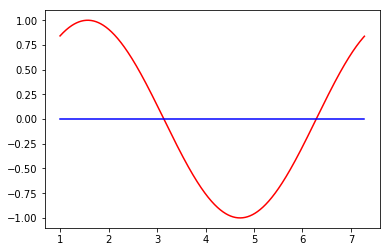

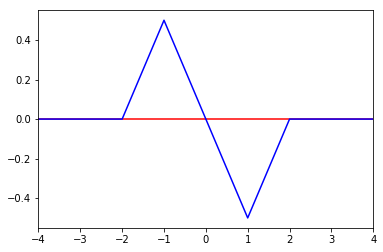

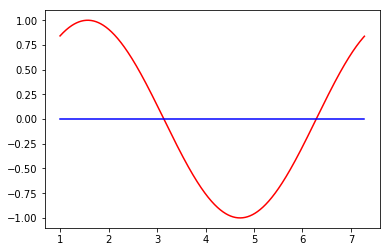

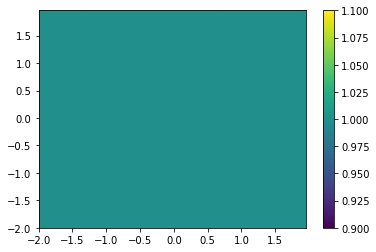

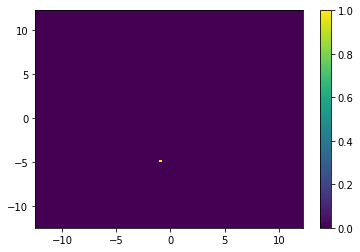

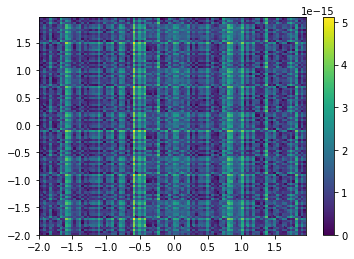

In [37]:
%pylab inline

import numpy as np
import scipy as sp
from scipy import constants
import matplotlib.pyplot as plt
#import scipy.fftpack

def Fourier1D(x, fx):
    N = len(x)
    dx = x[1]-x[0]
    _Dx = 1/dx
    _x = np.linspace(-_Dx/2, _Dx/2, N, endpoint=False)
    _fx = np.fft.fftshift(np.fft.fft(fx))/N*np.exp(-1j*2.0*np.pi*x[0]*_x)
    return _x, _fx

def InvFourier1D(x, _x, _fx):
    N = len(x)
    fx = np.fft.ifft(np.fft.ifftshift(_fx*np.exp(+1j*2.0*np.pi*x[0]*_x)))*N
    return fx

def Fourier2D(x, y, fxy):
    Nx, Ny = x.shape
    dx = x[1,0]-x[0,0]
    dy = y[0,1]-y[0,0]
    _Dx = 1.0/dx
    _Dy = 1.0/dy
    _x = np.linspace(-_Dx/2, _Dx/2, Nx, endpoint=False)
    _y = np.linspace(-_Dy/2, _Dy/2, Ny, endpoint=False)
    _X, _Y = np.meshgrid(_x, _y, indexing='ij')
    _fxy = np.fft.fftshift(np.fft.fft2(fxy))/(Nx*Ny)*np.exp(-1j*2.0*np.pi*x[0,0]*_X)*np.exp(-1j*2.0*np.pi*y[0,0]*_Y)
    return _X, _Y, _fxy

def InvFourier2D(x, y, _x, _y, _fxy):
    Nx, Ny = x.shape
    fxy = np.fft.ifft2(np.fft.ifftshift(_fxy*np.exp(+1j*2.0*np.pi*x[0,0]*_x)*np.exp(+1j*2.0*np.pi*y[0,0]*_y)))*Nx*Ny
    return fxy



x0 = 1
N = 1000
x = np.linspace(x0+0, x0+2.0*pi, N, endpoint=False)
fun_x = lambda x: np.sin(x)

fx = fun_x(x)

_x, _fx = Fourier1D(x, fx)

plot(x, np.real(fx), 'r')
plot(x, np.imag(fx), 'b')
show()

plot(2.0*pi*_x, np.real(_fx), 'r')
plot(2.0*pi*_x, np.imag(_fx), 'b')
xlim(-4, 4)
show()

fx = InvFourier1D(x, _x, _fx)
plot(x, np.real(fx), 'r')
plot(x, np.imag(fx), 'b')
show()


##-------------

N = 100
x0, x1 = -2, 2
y0, y1 = -2, 2
x = np.linspace(x0, x1, N, endpoint=False)
y = np.linspace(y0, y1, N, endpoint=False)

X, Y = meshgrid(x, y, indexing='ij')
Ex0 = np.exp(-1j*2*pi*X)*np.exp(-1j*2*pi*5*Y)
Ey0 = X*0
pcolor(X, Y, np.abs(Ex0))
colorbar()
show()

FX, FY, Ex0_f = Fourier2D(X, Y, Ex0)
pcolor(FX, FY, np.abs(Ex0_f))
colorbar()
show()

Ex0_ = InvFourier2D(X, Y, FX, FY, Ex0_f)
pcolor(X, Y, np.abs(Ex0_-Ex0))
colorbar()
show()


Populating the interactive namespace from numpy and matplotlib


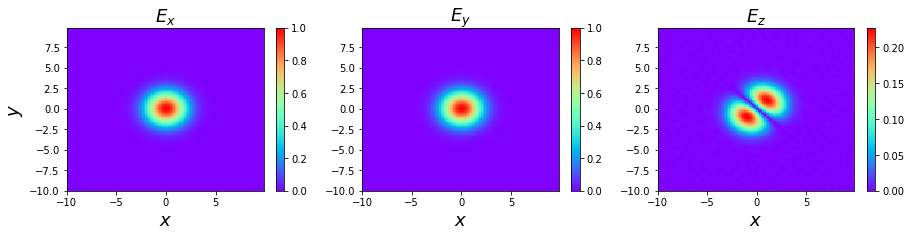

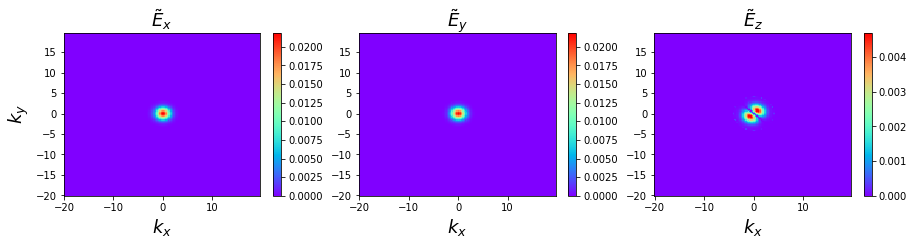

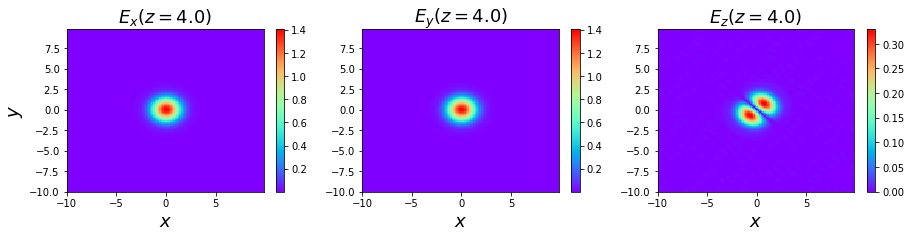

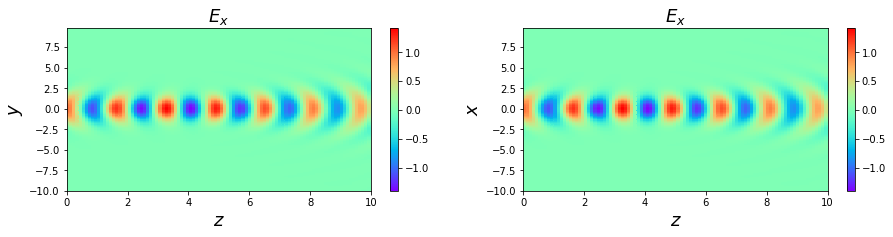

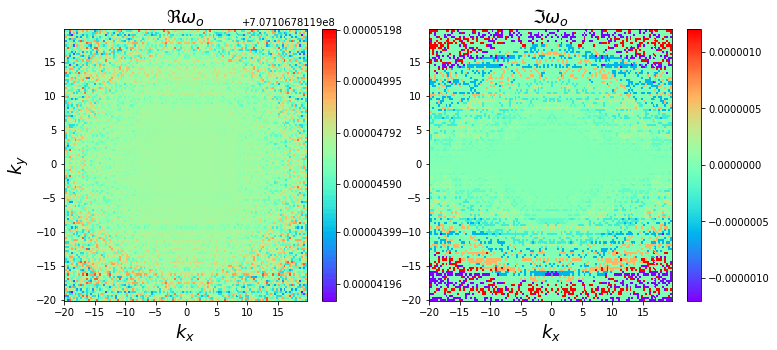

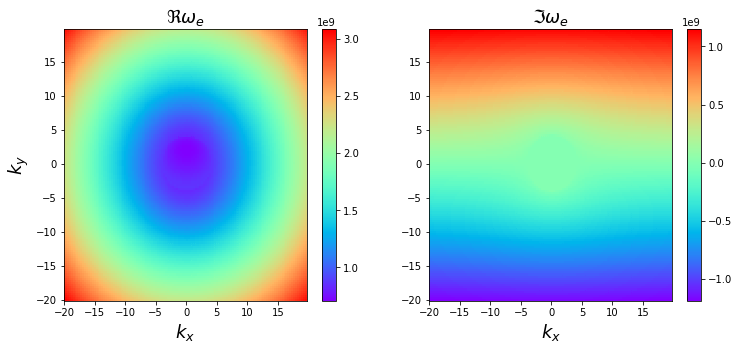

0/10 0/10 1/10 2/10 3/10 4/10 5/10 6/10 7/10 8/10 9/10 0/10 

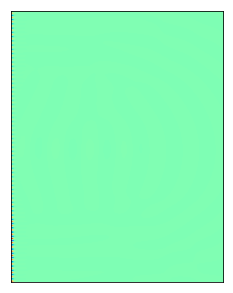

In [45]:
%pylab inline

import numpy as np
import scipy as sp
import matplotlib.animation as animation
import matplotlib.cm as cm

def rotateX(v, theta):
    A = np.matrix([[1.0, 0.0,            0.0          ], 
                   [0.0, np.cos(theta), -np.sin(theta)],
                   [0.0, np.sin(theta),  np.cos(theta)]])
    return np.squeeze(np.asarray(v.dot(A.T)))

def rotateY(v, theta):
    A = np.matrix([[np.cos(theta), 0.0, -np.sin(theta)],
                   [0.0,           1.0,  0.0          ],
                   [np.sin(theta), 0.0,  np.cos(theta)]])
    return np.squeeze(np.asarray(v.dot(A.T)))


def isoToUniaxialGaussian():
    N = 2**7
    x0, x1 = -10, 10
    y0, y1 = -10, 10
    fontsize = 18
    x = np.linspace(x0, x1, N, endpoint=False)
    y = np.linspace(y0, y1, N, endpoint=False)

    w_iso = 1.0*constants.giga
    eps_r_iso = 1.5
    k_iso = w_iso/constants.c*np.sqrt(eps_r_iso)
    lambda_iso = 2.0*np.pi/k_iso
    z_G = 5.0*lambda_iso

    X, Y = np.meshgrid(x, y, indexing='ij')
    Ex0 = np.exp(-(X**2 + Y**2)/2.0**2)*np.exp(+1j*k_iso*np.sqrt(X**2+Y**2+z_G**2))
    Ey0 = Ex0

    FX, FY, Ex0_f = Fourier2D(X, Y, Ex0)
    _, _, Ey0_f = Fourier2D(X, Y, Ey0)
    KX = 2.0*np.pi*FX
    KY = 2.0*np.pi*FY

    KZ = np.sqrt(0j+ k_iso**2 - KX**2 - KY**2)
    KZ = KZ*(np.imag(KZ)<=0) - KZ*(np.imag(KZ)>0) 

    Ez0_f = (Ex0_f*KX + Ey0_f*KY)/(-KZ)
    Ez0 = InvFourier2D(X, Y, FX, FY, Ez0_f) 
    
    #figsize(15,3)
    plt.rcParams["figure.figsize"] = (15,3)
    
    plt.subplot(1, 3, 1)
    plt.pcolor(X, Y, np.abs(Ex0), cmap=cm.rainbow)
    plt.colorbar()
    plt.title(r'$E_x$', fontsize=fontsize)
    plt.xlabel('$x$', fontsize=fontsize)
    plt.ylabel('$y$', fontsize=fontsize)
    plt.subplot(1, 3, 2)
    plt.pcolor(X, Y, np.abs(Ey0), cmap=cm.rainbow)
    plt.colorbar()
    plt.title(r'$E_y$', fontsize=fontsize)
    plt.xlabel('$x$', fontsize=fontsize)
    plt.subplot(1, 3, 3)
    plt.pcolor(X, Y, np.abs(Ez0), cmap=cm.rainbow)
    plt.colorbar()
    plt.title(r'$E_z$', fontsize=fontsize)
    plt.xlabel('$x$', fontsize=fontsize)
    plt.show()
    
         
    plt.subplot(1, 3, 1)
    plt.pcolor(KX, KY, np.abs(Ex0_f), cmap=cm.rainbow)
    plt.colorbar()
    plt.title(r'$\tilde{E}_x$', fontsize=fontsize)
    plt.xlabel('$k_x$', fontsize=fontsize)
    plt.ylabel('$k_y$', fontsize=fontsize)
    plt.subplot(1, 3, 2)
    plt.pcolor(KX, KY, np.abs(Ey0_f), cmap=cm.rainbow)
    plt.colorbar()
    plt.title(r'$\tilde{E}_y$', fontsize=fontsize)
    plt.xlabel('$k_x$', fontsize=fontsize)
    plt.subplot(1, 3, 3)
    plt.pcolor(KX, KY, np.abs(Ez0_f), cmap=cm.rainbow)
    plt.colorbar()
    plt.title(r'$\tilde{E}_z$', fontsize=fontsize)
    plt.xlabel('$k_x$', fontsize=fontsize)
    plt.show()


    z = 4.0
    Ex_z_f = Ex0_f*np.exp(-1j*KZ*z)
    Ey_z_f = Ey0_f*np.exp(-1j*KZ*z)
    Ez_z_f = Ez0_f*np.exp(-1j*KZ*z)
    Ex_z = InvFourier2D(X, Y, FX, FY, Ex_z_f)
    Ey_z = InvFourier2D(X, Y, FX, FY, Ey_z_f)
    Ez_z = InvFourier2D(X, Y, FX, FY, Ez_z_f)

    plt.subplot(1, 3, 1)
    plt.pcolor(X, Y, np.abs(Ex_z), cmap=cm.rainbow)
    plt.colorbar()
    plt.title(r'$E_x(z={})$'.format(z), fontsize=fontsize)
    plt.xlabel('$x$', fontsize=fontsize)
    plt.ylabel('$y$', fontsize=fontsize)
    plt.subplot(1, 3, 2)
    plt.pcolor(X, Y, np.abs(Ey_z), cmap=cm.rainbow)
    plt.colorbar()
    plt.title(r'$E_y(z={})$'.format(z), fontsize=fontsize)
    plt.xlabel('$x$', fontsize=fontsize)
    plt.subplot(1, 3, 3)
    plt.pcolor(X, Y, np.abs(Ez_z), cmap=cm.rainbow)
    plt.colorbar()
    plt.title(r'$E_z(z={})$'.format(z), fontsize=fontsize)
    plt.xlabel('$x$', fontsize=fontsize)
    plt.show()


    z = np.linspace(0.0, 10.0, 100)
    _Z_, _Y_ = np.meshgrid(z, y, indexing='ij')
    Ex_zy = np.zeros(_Y_.shape, dtype=complex)
    Ey_zy = np.zeros(_Y_.shape, dtype=complex)
    Ez_zy = np.zeros(_Y_.shape, dtype=complex)
    _  , _X_ = np.meshgrid(z, x, indexing='ij')
    Ex_zx = np.zeros(_X_.shape, dtype=complex)
    Ey_zx = np.zeros(_X_.shape, dtype=complex)
    Ez_zx = np.zeros(_X_.shape, dtype=complex)
    for i in range(len(z)):
        Ex_z_f = Ex0_f*np.exp(-1j*KZ*z[i])
        Ey_z_f = Ey0_f*np.exp(-1j*KZ*z[i])
        Ez_z_f = Ez0_f*np.exp(-1j*KZ*z[i])
        Ex_z = InvFourier2D(X, Y, FX, FY, Ex_z_f)
        Ey_z = InvFourier2D(X, Y, FX, FY, Ey_z_f) 
        Ez_z = InvFourier2D(X, Y, FX, FY, Ez_z_f)
        Ex_zy[i, :] = Ex_z[int(N/2), :]
        Ey_zy[i, :] = Ey_z[int(N/2), :]
        Ez_zy[i, :] = Ez_z[int(N/2), :]
        Ex_zx[i, :] = Ex_z[:, int(N/2)]
        Ey_zx[i, :] = Ey_z[:, int(N/2)]
        Ez_zx[i, :] = Ez_z[:, int(N/2)]

    plt.subplot(1, 2, 1)
    plt.pcolor(_Z_, _Y_, np.real(Ex_zy), cmap=cm.rainbow)
    plt.colorbar()
    plt.title(r'$E_x$', fontsize=fontsize)
    plt.xlabel('$z$', fontsize=fontsize)
    plt.ylabel('$y$', fontsize=fontsize)
    plt.subplot(1, 2, 2)
    plt.pcolor(_Z_, _X_, np.real(Ex_zx), cmap=cm.rainbow)
    plt.colorbar()
    plt.title(r'$E_x$', fontsize=fontsize)
    plt.xlabel('$z$', fontsize=fontsize)
    plt.ylabel('$x$', fontsize=fontsize)
    plt.show()


    T = 2.0*np.pi/w_iso

    save_as_anim = False 
    if save_as_anim:
        plt.rcParams["figure.figsize"] = (5,5)
        n_pt = 40
        t = np.linspace(0, 6.0*T, n_pt)
        def animate_E(i):
            t_i = t[i]
            Z = np.real(np.exp(1j*w_iso*t_i)*Ex_zy)
            fig = plt.imshow(Z.T, interpolation='bilinear', cmap=cm.rainbow, 
                              origin='lower', vmax=abs(Z).max(), vmin=-abs(Z).max())
            #plt.subplots_adjust(left=0.1, bottom=0, right=0.9, top=1, wspace=0.0, hspace=0.0)
            plt.gca().get_xaxis().set_visible(False)
            plt.gca().get_yaxis().set_visible(False)
            return fig

        fig = plt.figure()
        anim = animation.FuncAnimation(fig, animate_E, frames=n_pt, interval=1, repeat=True)
        file_name = os.path.join(dir_name, 'gaussian'+'.gif')
        anim.save(file_name, writer="imagemagick", fps=15, dpi=200)
        plt.show()

    theta_x, theta_y = 30.0*np.pi/180.0, 0.0
    eps_rxy, eps_rz = 3.0, 2.0

    w_o, w_e = np.zeros(KX.shape, dtype=complex), np.zeros(KX.shape, dtype=complex)
    c_do_p, c_do_m = np.zeros(KX.shape, dtype=complex), np.zeros(KX.shape, dtype=complex)
    c_de_p, c_de_m = np.zeros(KX.shape, dtype=complex), np.zeros(KX.shape, dtype=complex)
    Do0x_f, Do0y_f, Do0z_f = np.zeros(KX.shape, dtype=complex), np.zeros(KX.shape, dtype=complex), np.zeros(KX.shape, dtype=complex)
    De0x_f, De0y_f, De0z_f = np.zeros(KX.shape, dtype=complex), np.zeros(KX.shape, dtype=complex), np.zeros(KX.shape, dtype=complex)

    for i in range(N):
        for j in range(N):
            #print(KX[i, j], KY[i, j], KZ[i, j])
            E_iso = np.array([Ex0_f[i, j], Ey0_f[i, j], Ez0_f[i, j]])
            k_v_iso = np.array([KX[i, j], KY[i, j], KZ[i, j]])
            #print(E_iso.shape, k_v_iso.shape)
            E_iso = rotateX(E_iso, theta_x)
            E_iso = rotateY(E_iso, theta_y)
            k_v_iso = rotateX(k_v_iso, theta_x)
            k_v_iso = rotateY(k_v_iso, theta_y)
            #print(E_iso.shape, k_v_iso.shape)
            #print(k_v_iso, k_v_iso.dot(k_v_iso))
            #time.sleep(1)
            isotoux = IsotropicToUniaxialTimeStep()
            isotoux.setIsotropicParameters(k_v_iso, E_iso, eps_r_iso)
            isotoux.setUniaxialParameters(eps_rxy, eps_rz)
            w_o[i,j], w_e[i,j] = isotoux.getWo(), isotoux.getWe()
            c_do_pm, c_de_pm = isotoux.get_a_eo_pm()
            c_do_p[i,j], c_do_m[i,j] = c_do_pm
            c_de_p[i,j], c_de_m[i,j] = c_de_pm
            De0x_f_ij, De0y_f_ij, De0z_f_ij = isotoux.getDe()
            Do0x_f_ij, Do0y_f_ij, Do0z_f_ij = isotoux.getDo()
            De0x_f_ij, De0y_f_ij, De0z_f_ij = rotateY(np.array([De0x_f_ij, De0y_f_ij, De0z_f_ij]), -theta_y)
            De0x_f_ij, De0y_f_ij, De0z_f_ij = rotateX(np.array([De0x_f_ij, De0y_f_ij, De0z_f_ij]), -theta_x)
            De0x_f[i,j], De0y_f[i,j], De0z_f[i,j] = De0x_f_ij, De0y_f_ij, De0z_f_ij
            Do0x_f_ij, Do0y_f_ij, Do0z_f_ij = rotateY(np.array([Do0x_f_ij, Do0y_f_ij, Do0z_f_ij]), -theta_y)
            Do0x_f_ij, Do0y_f_ij, Do0z_f_ij = rotateX(np.array([Do0x_f_ij, Do0y_f_ij, Do0z_f_ij]), -theta_x)
            Do0x_f[i,j], Do0y_f[i,j], Do0z_f[i,j] = Do0x_f_ij, Do0y_f_ij, Do0z_f_ij


    plt.rcParams["figure.figsize"] = (12,5)
    plt.subplot(1, 2, 1)
    plt.pcolor(KX, KY, np.real(w_o), cmap=cm.rainbow)
    plt.colorbar()
    plt.title(r'$\Re{\omega_o}$', fontsize=fontsize)
    plt.xlabel('$k_x$', fontsize=fontsize)
    plt.ylabel('$k_y$', fontsize=fontsize)
    plt.subplot(1, 2, 2)
    plt.pcolor(KX, KY, np.imag(w_o), cmap=cm.rainbow)
    plt.colorbar()
    plt.title(r'$\Im{\omega_o}$', fontsize=fontsize)
    plt.xlabel('$k_x$', fontsize=fontsize)
    plt.show()
    
    plt.subplot(1, 2, 1)
    plt.pcolor(KX, KY, np.real(w_e), cmap=cm.rainbow)
    plt.colorbar()
    plt.title(r'$\Re{\omega_e}$', fontsize=fontsize)
    plt.xlabel('$k_x$', fontsize=fontsize)
    plt.ylabel('$k_y$', fontsize=fontsize)
    plt.subplot(1, 2, 2)
    plt.pcolor(KX, KY, np.imag(w_e), cmap=cm.rainbow)
    plt.colorbar()
    plt.title(r'$\Im{\omega_e}$', fontsize=fontsize)
    plt.xlabel('$k_x$', fontsize=fontsize)
    plt.show()


    plt.rcParams["figure.figsize"] = (5,5)

    Dx_op_zy = np.zeros(_Y_.shape, dtype=complex)
    Dy_op_zy = np.zeros(_Y_.shape, dtype=complex)
    Dz_op_zy = np.zeros(_Y_.shape, dtype=complex)
    Dx_om_zy = np.zeros(_Y_.shape, dtype=complex)
    Dy_om_zy = np.zeros(_Y_.shape, dtype=complex)
    Dz_om_zy = np.zeros(_Y_.shape, dtype=complex)
    Dx_ep_zy = np.zeros(_Y_.shape, dtype=complex)
    Dy_ep_zy = np.zeros(_Y_.shape, dtype=complex)
    Dz_ep_zy = np.zeros(_Y_.shape, dtype=complex)
    Dx_em_zy = np.zeros(_Y_.shape, dtype=complex)
    Dy_em_zy = np.zeros(_Y_.shape, dtype=complex)
    Dz_em_zy = np.zeros(_Y_.shape, dtype=complex)

    save_as_anim_ux = True 
    if save_as_anim_ux:
        n_pt = 10
        t = np.linspace(6.0*T, 8.0*T, n_pt)
        def animate_E(i_t):
            t_i = t[i_t]
            print('{}/{}'.format(i_t, n_pt), end=' ')
            for i in range(len(z)): 
                Dx_op_z_f = c_do_p*Do0x_f*np.exp(1j*w_o*t_i)*np.exp(-1j*KZ*z[i])
                Dy_op_z_f = c_do_p*Do0y_f*np.exp(1j*w_o*t_i)*np.exp(-1j*KZ*z[i])
                Dz_op_z_f = c_do_p*Do0z_f*np.exp(1j*w_o*t_i)*np.exp(-1j*KZ*z[i])
                Dx_op_z = InvFourier2D(X, Y, FX, FY, Dx_op_z_f)
                Dy_op_z = InvFourier2D(X, Y, FX, FY, Dy_op_z_f)
                Dz_op_z = InvFourier2D(X, Y, FX, FY, Dz_op_z_f)
                Dx_op_zy[i, :] = Dx_op_z[int(N/2), :]
                Dy_op_zy[i, :] = Dy_op_z[int(N/2), :]
                Dz_op_zy[i, :] = Dz_op_z[int(N/2), :]

                Dx_om_z_f = c_do_m*Do0x_f*np.exp(-1j*w_o*t_i)*np.exp(-1j*KZ*z[i])
                Dy_om_z_f = c_do_m*Do0y_f*np.exp(-1j*w_o*t_i)*np.exp(-1j*KZ*z[i])
                Dz_om_z_f = c_do_m*Do0z_f*np.exp(-1j*w_o*t_i)*np.exp(-1j*KZ*z[i])
                Dx_om_z = InvFourier2D(X, Y, FX, FY, Dx_om_z_f)
                Dy_om_z = InvFourier2D(X, Y, FX, FY, Dy_om_z_f)
                Dz_om_z = InvFourier2D(X, Y, FX, FY, Dz_om_z_f)
                Dx_om_zy[i, :] = Dx_om_z[int(N/2), :]
                Dy_om_zy[i, :] = Dy_om_z[int(N/2), :]
                Dz_om_zy[i, :] = Dz_om_z[int(N/2), :]

                Dx_ep_z_f = c_de_p*De0x_f*np.exp(1j*w_e*t_i)*np.exp(-1j*KZ*z[i])
                Dy_ep_z_f = c_de_p*De0y_f*np.exp(1j*w_e*t_i)*np.exp(-1j*KZ*z[i])
                Dz_ep_z_f = c_de_p*De0z_f*np.exp(1j*w_e*t_i)*np.exp(-1j*KZ*z[i])
                Dx_ep_z = InvFourier2D(X, Y, FX, FY, Dx_ep_z_f)
                Dy_ep_z = InvFourier2D(X, Y, FX, FY, Dy_ep_z_f)
                Dz_ep_z = InvFourier2D(X, Y, FX, FY, Dz_ep_z_f)
                Dx_ep_zy[i, :] = Dx_ep_z[int(N/2), :]
                Dy_ep_zy[i, :] = Dy_ep_z[int(N/2), :]
                Dz_ep_zy[i, :] = Dz_ep_z[int(N/2), :]

                Dx_em_z_f = c_de_m*De0x_f*np.exp(-1j*w_e*t_i)*np.exp(-1j*KZ*z[i])
                Dy_em_z_f = c_de_m*De0y_f*np.exp(-1j*w_e*t_i)*np.exp(-1j*KZ*z[i])
                Dz_em_z_f = c_de_m*De0z_f*np.exp(-1j*w_e*t_i)*np.exp(-1j*KZ*z[i])
                Dx_em_z = InvFourier2D(X, Y, FX, FY, Dx_em_z_f)
                Dy_em_z = InvFourier2D(X, Y, FX, FY, Dy_em_z_f)
                Dz_em_z = InvFourier2D(X, Y, FX, FY, Dz_em_z_f)
                Dx_em_zy[i, :] = Dx_em_z[int(N/2), :]
                Dy_em_zy[i, :] = Dy_em_z[int(N/2), :]
                Dz_em_zy[i, :] = Dz_em_z[int(N/2), :]


            Z = np.real(Dx_op_zy + Dx_om_zy + Dx_ep_zy + Dx_em_zy)
            #Z = np.real(Dx_em_zy)
            fig = plt.imshow(Z.T, interpolation='bilinear', cmap=cm.rainbow, 
                              origin='lower', vmax=abs(Z).max(), vmin=-abs(Z).max())
            plt.gca().get_xaxis().set_visible(False)
            plt.gca().get_yaxis().set_visible(False)
            return fig

        fig = plt.figure()
        anim = animation.FuncAnimation(fig, animate_E, frames=n_pt, interval=1, repeat=True)
        file_name = os.path.join(dir_name, 'gaussian-ux'+'.gif')
        anim.save(file_name, writer="imagemagick", fps=15, dpi=200)
        plt.show()

        
isoToUniaxialGaussian()



In [2]:
import numpy as np

file_params = os.path.join(dir_name, 'params.txt')

filedata = None
myfile = open(file_params, 'r')
filedata = myfile.read()
myfile.close()
    
def find_block(data, param):
    i_param = data.find(param)
    if i_param>=0:
        i_beg = data.find(r'{', i_param+len(param))
        i_end = data.find(r'}', i_param+len(param))
        if i_beg>=0 and i_end>=0 and i_end>i_beg:
            param = data[i_beg+1:i_end]
            return param
    return None

def find_param(data, param):
    i_param = data.find(param)
    if i_param>=0:
        i_beg = data.find(r'(', i_param+len(param))
        i_end = data.find(r')', i_param+len(param))
        if i_beg>=0 and i_end>=0 and i_end>i_beg:
            param = data[i_beg+1:i_end]
            return param.split(',')
    return None
        
def liststr_to_floats(list_str):
    list_float = [float(list_str[i]) for i in range(len(list_str))]
    return list_float
    
def get_theta_sweep_params(filedata):
    run_theta_sweep = find_param(filedata, '$run_theta_sweep')  
    if run_theta_sweep!=None and run_theta_sweep[0]=='yes':
        block = find_block(filedata, '$run_theta_sweep_block')
        phi = liststr_to_floats(find_param(block, '$phi'))[0]*np.pi/180.0
        w_iso = liststr_to_floats(find_param(block, '$w_iso'))[0]
        eps_r_iso = liststr_to_floats(find_param(block, '$eps_r_iso'))[0]
        eps_r_o = liststr_to_floats(find_param(block, '$eps_r_o'))[0]
        eps_r_e = liststr_to_floats(find_param(block, '$eps_r_e'))[0]
        pol = liststr_to_floats(find_param(block, '$pol'))
        n_points = int(liststr_to_floats(find_param(block, '$n_points'))[0])
        y_lim = liststr_to_floats(find_param(block, '$y_lim'))
        return {'phi':phi, 'w_iso':w_iso, 'eps_r_iso':eps_r_iso, 'eps_r_o':eps_r_o,\
                'eps_r_e':eps_r_e, 'pol':pol, 'n_points':n_points, 'y_lim':y_lim}
    else:
        return None

def get_phi_sweep_params(filedata):
    run_phi_sweep = find_param(filedata, '$run_phi_sweep')  
    if run_phi_sweep!=None and run_phi_sweep[0]=='yes':
        block = find_block(filedata, '$run_phi_sweep_block')
        theta = liststr_to_floats(find_param(block, '$theta'))[0]*np.pi/180.0
        w_iso = liststr_to_floats(find_param(block, '$w_iso'))[0]
        eps_r_iso = liststr_to_floats(find_param(block, '$eps_r_iso'))[0]
        eps_r_o = liststr_to_floats(find_param(block, '$eps_r_o'))[0]
        eps_r_e = liststr_to_floats(find_param(block, '$eps_r_e'))[0]
        pol = liststr_to_floats(find_param(block, '$pol'))
        n_points = int(liststr_to_floats(find_param(block, '$n_points'))[0])
        y_lim = liststr_to_floats(find_param(block, '$y_lim'))
        return {'theta':theta, 'w_iso':w_iso, 'eps_r_iso':eps_r_iso, 'eps_r_o':eps_r_o,\
                'eps_r_e':eps_r_e, 'pol':pol, 'n_points':n_points, 'y_lim':y_lim}
    else:
        return None

print(get_theta_sweep_params(filedata))
print(get_phi_sweep_params(filedata))


{'eps_r_e': 2.0, 'eps_r_iso': 1.5, 'pol': [1.0, 1.0], 'y_lim': [-1.0, 1.0], 'phi': 0.0, 'w_iso': 1000000000.0, 'eps_r_o': 3.0, 'n_points': 1000}
{'eps_r_e': 2.0, 'eps_r_iso': 1.5, 'pol': [1.0, 1.0, 0.0], 'y_lim': [-1.0, 1.0], 'theta': 1.5707963267948966, 'w_iso': 1000000000.0, 'eps_r_o': 3.0, 'n_points': 1000}


In [42]:
filedata_win = filedata.replace('\n', '\r\n')
myfile = open(file_params, 'w')
myfile.write(filedata_win)
myfile.write('this is a test\n')
myfile.close()

repr(filedata_win)

"'\\r\\n\\r\\n$run_theta_sweep=(yes)       ##yes: does a theta sweep, no: it does not\\r\\n$run_theta_sweep_block:{\\r\\n$phi=(0.0)                   ##in degrees. phi is fixed and theta is sweeped\\r\\n$w_iso=(1.0e9)               ##incident omega (isotropic medium)\\r\\n$eps_r_iso=(1.5)             ##isotropic medium epsilon_r\\r\\n$eps_r_o=(3.0)               ##uniaxial medium epsilon_ro\\r\\n$eps_r_e=(2.0)               ##uniaxial medium epsilon_re\\r\\n$pol=(1.0,1.0)               ##polarization= pol(1)*a_theta+pol(2)*a_phi where a_theta and a_phi are the unit vectors along theta and phi \\r\\n$n_points=(1000)             ##number of points in the plot\\r\\n$y_lim=(-1,1)                ##limits on the y axis\\r\\n}\\r\\n\\r\\n$run_phi_sweep=(yes)          ##yes: does a phi sweep, no: it does not\\r\\n$run_phi_sweep_block:{\\r\\n$theta=(90)                  ##in degrees. theta is fixed and phi is sweeped\\r\\n$w_iso=(1.0e9)               ##incident omega (isotropic medium)\\r\\n$ep